# 对酒店真实评论进行情感分类

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# 设置显示风格
plt.style.use('fivethirtyeight')

## 读取数据

In [2]:
train_data = pd.read_csv('../data/cn_data_rate/train.tsv',sep='\t')
valid_data = pd.read_csv('../data/cn_data_rate/dev.tsv',sep='\t')

## 获取训练数据和标签数据的分布
> 在深度学习模型评估中，一般使用ACC作为评估标准，要想ACC基线定义在50%左右，则需要我们的正负样本比例维持在1:1左右，否则需要进行必要的数据增强或数据删减；

E:\Anaconda3\envs\sentimentAnalysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


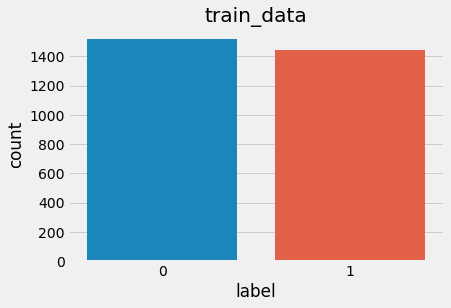

In [3]:
# 训练集分布
sns.countplot('label',data=train_data)
plt.title('train_data')
plt.show()

E:\Anaconda3\envs\sentimentAnalysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


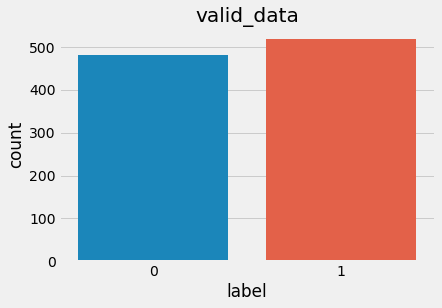

In [4]:
# 验证集分布
sns.countplot('label',data=valid_data)
plt.title('valid_data')
plt.show()

## 获取训练集和验证集的句子长度分布

## 训练集

E:\Anaconda3\envs\sentimentAnalysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


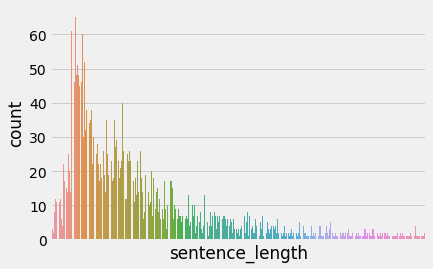

E:\Anaconda3\envs\sentimentAnalysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


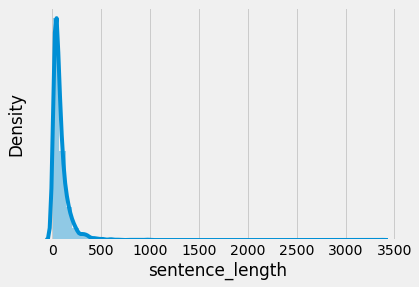

In [5]:
# 获取句子长度
train_data['sentence_length'] = list( map(lambda x:len(x),train_data['sentence']) )

# 绘制句子长度的数量分布图
sns.countplot('sentence_length',data = train_data)
plt.xticks([])
plt.show()

# 绘制dist长度分布图
sns.distplot(train_data['sentence_length'])
plt.yticks([])
plt.show()

## 测试集

E:\Anaconda3\envs\sentimentAnalysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


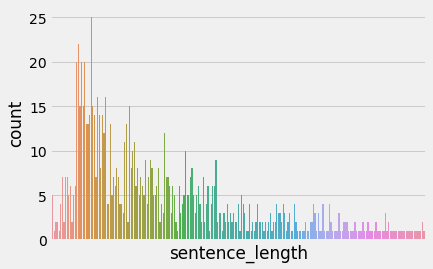

E:\Anaconda3\envs\sentimentAnalysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


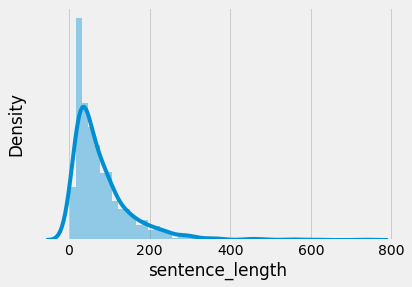

In [6]:
# 获取句子长度
valid_data['sentence_length'] = list( map(lambda x:len(x),valid_data['sentence']) )

# 绘制句子长度的数量分布图
sns.countplot('sentence_length',data = valid_data)
plt.xticks([])
plt.show()

# 绘制dist长度分布图
sns.distplot(valid_data['sentence_length'])
plt.yticks([])
plt.show()

## 绘制散点图

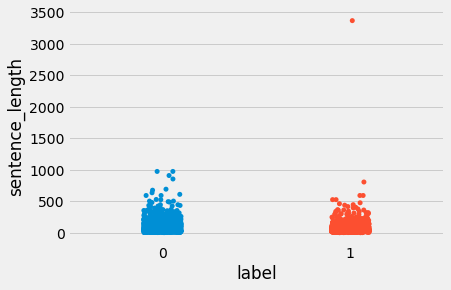

In [7]:
# 训练集上正负样本的长度散点分布
sns.stripplot(y='sentence_length',x='label',data=train_data)
plt.show()

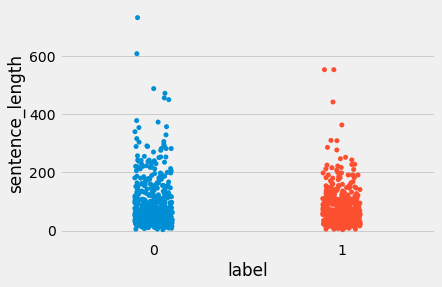

In [8]:
# 验证集长度分布散点图
sns.stripplot(y='sentence_length',x='label',data=valid_data)
plt.show()

**通过绘制句子长度分布图，得知预料中大部分句子长度的分布范围，模型输入要求为固定尺寸的张量，确定合理长度范围，之后做对应的截断和补齐；显然上图大部分句子范围在20-250之间；**

# 获取训练集上的正负样本高频形容词词云

## 词汇标注

In [9]:
import jieba.posseg as pseg

def get_a_list(text):
    """获取形容词列表"""
    r=[]
    for g in pseg.lcut(text):
        if g.flag == 'a':
            r.append(g.word)
    return r

## 绘制词云

In [63]:
from wordcloud import WordCloud
from itertools import chain

def get_word_cloud(keywords_list):
    # 选用路径字体

    wordcloud = WordCloud(font_path='../models/SimHei.ttf',max_words=100,background_color='white')
    # 将传入的列表转化为词云生成器所要的字符串
    keywords_string = ' '.join(keywords_list) #注意此处是用空格隔开
    wordcloud = wordcloud.generate(keywords_string)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

## 获取数据并绘制

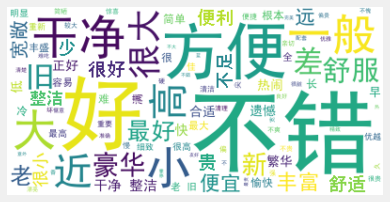

In [64]:
# 获取训练集上的正样本
p_train_data = train_data[train_data['label']==1]['sentence']

# 正样本的形容词
train_p_a_vocab = chain(*map(lambda x:get_a_list(x),p_train_data))

# wordcloud = WordCloud(font_path='../models/SimHei.ttf',max_words=100,background_color='white')
# keywords_string = ' '.join(train_p_a_vocab)

# 绘制
get_word_cloud(train_p_a_vocab)

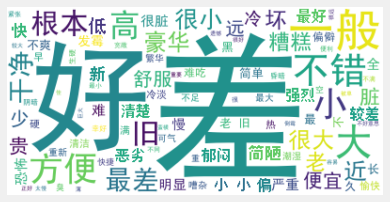

In [65]:
# 获取训练集上的负样本
n_train_data = train_data[train_data['label']==0]['sentence']

# 负样本的形容词
train_n_a_vocab = chain(*map(lambda x:get_a_list(x),n_train_data))

get_word_cloud(train_n_a_vocab)